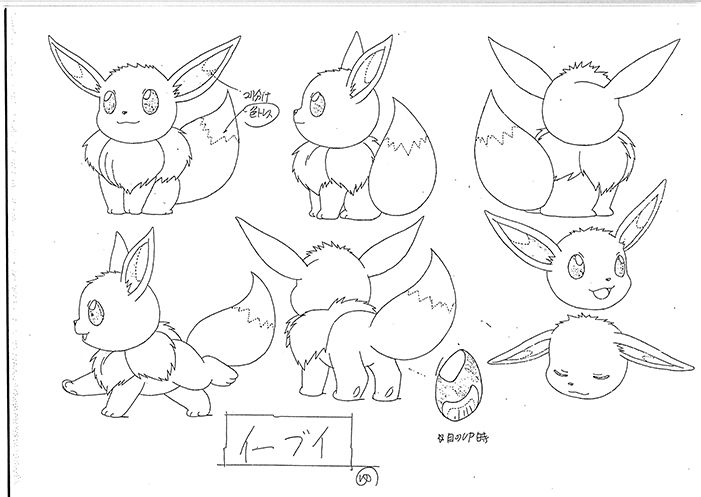

In [22]:

from pynq import Xlnk
mem_manager = Xlnk()
import pynq_cv.overlays.xv2Filter2DDilate as xv2
import cv2
import PIL.Image as image
import numpy as np

filename = "/home/xilinx/jupyter_notebooks/eeve.jpeg"
img = image.open(filename).convert('L')
img

In [23]:
kernel_g = {
        'laplacian high-pass':  np.array([[0.0, 1.0, 0],[1.0, -4, 1.0],[0, 1.0, 0.0]],np.float32),
        'gaussian high-pass': np.array([[-0.0625,-0.125,-0.0625],[-0.125,0.75,-0.125],[-0.0625,-0.125,-0.0625]],np.float32),
        'average blur':  np.ones((3,3),np.float32)/9.0,
        'gaussian blur': np.array([[0.0625,0.125,0.0625],[0.125,0.25,0.125],[0.0625,0.125,0.0625]],np.float32),
        'Sobel Ver': np.array([[1.0,0.0,-1.0],[2.0,0.0,-2.0],[1.0,0.0,-1.0]],np.float32),
        'Sobel Hor': np.array([[1.0,2.0,1.0],[0.0,0.0,0.0],[-1.0,-2.0,-1.0]],np.float32),
        'Sharpen': np.array([[0,-1,0],[-1, 5, -1],[0, -1, 0]],np.float32),
        'Edge1': np.array([[0,1,0],[1, 4, 1],[0, 1, 0]],np.float32),
        'Edge2': np.array([[0,-1,0],[-1, 8, -1],[0, -1, 0]],np.float32),
}

kernelD = np.ones((3,3),np.uint8)
buf     = np.ones((img.height,img.width),np.uint8)

In [26]:
def test_filter(kernelName):  
    xFbuf = mem_manager.cma_array((img.height,img.width),np.uint8)
    
    inframe = np.array(img)
#     output = xv2.filter2D(inframe, -1, kernel_g.get(kernelName, np.ones((3,3),np.float32)/9.0), xFbuf, (-1,-1), 0.0,borderType=cv2.BORDER_CONSTANT)
#     output = xv2.filter2D(inframe, -1, kernel_g.get(kernelName, np.ones((3,3),np.float32)/9.0), buf, (-1,-1), 0.0,borderType=cv2.BORDER_CONSTANT)
    xv2.filter2D(inframe, -1, kernel_g.get("average blur"), dst=buf, borderType=cv2.BORDER_CONSTANT)
    output = buf
    return output

In [ ]:
output = test_filter('average blur')
image.fromarray(output)

In [6]:
xv2

<module 'pynq_cv.overlays.xv2Filter2DDilate' from '/usr/local/lib/python3.6/dist-packages/pynq_cv/overlays/xv2Filter2DDilate.so'>

In [7]:
image

<module 'PIL.Image' from '/usr/lib/python3/dist-packages/PIL/Image.py'>

In [8]:
import pynq

/usr/local/lib/python3.6/dist-packages/setuptools/distutils_patch.py:26: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  "Distutils was imported before Setuptools. This usage is discouraged "


In [9]:
pynq

<module 'pynq' from '/usr/local/lib/python3.6/dist-packages/pynq/__init__.py'>

In [14]:
import cv2

In [21]:
cv2

<module 'cv2' from '/usr/lib/python3/dist-packages/cv2.cpython-36m-arm-linux-gnueabihf.so'>

In [18]:
xv2.filter2D

<function filter2D>

In [20]:
xv2.filter2Daf

AttributeError: module 'pynq_cv.overlays.xv2Filter2DDilate' has no attribute 'filter2Daf'